# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}



from sklearn.model_selection import GridSearchCV
grid_searh=GridSearchCV(estimator=model,param_grid=grid_param,cv=3,verbose=1)


grid_searh.fit(X_train,y_train)


—------------------------------------------------------------------------------------------------------------------

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

model_bagging_svc = BaggingClassifier(base_estimator=SVC(),n_estimators=50, random_state=0).fit(X, y)


y_predict_bagging=model_bagging_svc.predict(X_test)

accuracy_score(y_test,y_predict_bagging)


Rf_model_with_best_params=RandomForestClassifier(criterion='gini',max_depth= 14,max_features= 'log2',min_samples_leaf= 1,min_samples_split= 2,n_estimators=115)


### use bagging classiifer and regressor, 
### extra tree classifier and regressor, 
### voting classifer and regressor and 
### random forest classifier and regressor 
### on top of House hold consumpltion data and cencus data**

data link: https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption
        https://archive.ics.uci.edu/ml/datasets/census+income
    
sklearn_link:https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble'''

## Assignment 

In [1]:
# house hold consumption data:



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# importing preprocessing house hold consumption data

data=pd.read_csv("Power_Consumption.csv")

In [3]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_metering
0,1.370,0.000,241.60,5.6,0.0,0.0,19.0,19.0
1,0.242,0.142,243.97,1.2,0.0,2.0,0.0,2.0
2,0.220,0.000,246.93,0.8,0.0,0.0,0.0,0.0
3,0.256,0.000,249.41,1.0,0.0,0.0,1.0,1.0
4,0.350,0.148,250.09,1.4,0.0,2.0,1.0,3.0


In [4]:
# checking Duplicates:

data.duplicated().sum()

117

In [5]:
data=data.drop_duplicates()

In [6]:
data.duplicated().sum()

0

In [7]:
data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Total_metering'],
      dtype='object')

In [8]:
# assigning X and y dependent and independent variables

X=data.drop(columns=['Global_active_power', 'Sub_metering_1', 'Sub_metering_2','Sub_metering_3','Total_metering'])

X

,Global_reactive_power,Voltage,Global_intensity
0,0.000,241.60,5.6
1,0.142,243.97,1.2
2,0.000,246.93,0.8
3,0.000,249.41,1.0
4,0.148,250.09,1.4
...,...,...,...
39508,0.458,238.43,3.4
39509,0.066,241.28,1.4
39510,0.414,237.66,9.4
39511,0.140,245.17,1.8


In [9]:
y=data['Total_metering']

In [10]:
# Assigning X Train y_train, X_test, Y_test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
X_train

,Global_reactive_power,Voltage,Global_intensity
284,0.072,244.99,5.6
15144,0.156,243.80,1.6
35695,0.228,236.15,18.4
5094,0.000,240.97,8.6
8853,0.120,242.62,1.2
...,...,...,...
6267,0.000,241.07,0.6
11294,0.094,240.14,2.0
38265,0.244,241.99,1.6
860,0.072,241.26,1.6


In [12]:
y_train

284       1.0
15144     1.0
35695    56.0
5094     18.0
8853      1.0
         ... 
6267      1.0
11294     0.0
38265     0.0
860       1.0
15809     1.0
Name: Total_metering, Length: 26395, dtype: float64

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_tf=scaler.fit_transform(X_train)

In [14]:
X_test_tf=scaler.transform(X_test)

### Simple Liner Regression

In [40]:
from sklearn.linear_model import LinearRegression
reg_lin=LinearRegression()
reg_lin.fit(X_train_tf,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:

from sklearn.metrics import r2_score

y_pred_lin=reg_lin.predict(X_test_tf)

score=r2_score(y_test,y_pred_lin)
print("R2_score=",score)

## Adjusted R square error

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

R2_score= 0.716170748803501


0.7161052346268764

### Support Vector Regression

In [42]:
from sklearn.svm import SVR
reg_SVR=SVR()
reg_SVR.fit(X_train_tf,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [43]:

from sklearn.metrics import r2_score

y_pred_SVR=reg_SVR.predict(X_test_tf)

score=r2_score(y_test,y_pred_SVR)
print("R2_score=",score)

## Adjusted R square error

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

R2_score= 0.7166988280583613


0.7166334357743092

### Using bagging regressor

In [15]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
bag_regr = BaggingRegressor(base_estimator=SVR(),n_estimators=10, random_state=0)
bag_regr.fit(X_train_tf, y_train)

BaggingRegressor(base_estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                    epsilon=0.1, gamma='auto_deprecated',
                                    kernel='rbf', max_iter=-1, shrinking=True,
                                    tol=0.001, verbose=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
                 random_state=0, verbose=0, warm_start=False)

In [16]:
# checking with the test data:

from sklearn.metrics import r2_score

y_pred_bag_reg=bag_regr.predict(X_test_tf)

score=r2_score(y_test,y_pred_bag_reg)
print("R2_score=",score)

## Adjusted R square error

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

R2_score= 0.715592747625567


0.715527100033267

In [18]:
# checking with the train data

from sklearn.metrics import r2_score

y_pred_bag_reg=bag_regr.predict(X_train_tf)

score=r2_score(y_train,y_pred_bag_reg)
print("R2_score=",score)

## Adjusted R square error

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

R2_score= 0.7132678348874231


0.7132016506529584

In [38]:
# bagging regressor with hyper Tuning method

grid_param = {'n_estimators':[10,15,20,30], 'max_samples' : range(100,200,10)}



In [39]:
from sklearn.model_selection import GridSearchCV 

grid_searh=GridSearchCV(estimator=bag_regr,param_grid=grid_param,cv=3,verbose=1)


In [45]:
grid_searh.fit(X_train_tf,y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   34.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=SVR(C=1.0,
                                                           cache_size=200,
                                                           coef0=0.0, degree=3,
                                                           epsilon=0.1,
                                                           gamma='auto_deprecated',
                                                           kernel='rbf',
                                                           max_iter=-1,
                                                           shrinking=True,
                                                           tol=0.001,
                                                           verbose=False),
                                        bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
         

In [46]:
grid_searh.best_params_

{'max_samples': 190, 'n_estimators': 30}

In [82]:
bag_regr_hy = BaggingRegressor(base_estimator=SVR(),n_estimators=90, random_state=0,max_samples=10000)

In [83]:
bag_regr_hy.fit(X_train_tf,y_train)

BaggingRegressor(base_estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                    epsilon=0.1, gamma='auto_deprecated',
                                    kernel='rbf', max_iter=-1, shrinking=True,
                                    tol=0.001, verbose=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=10000, n_estimators=90, n_jobs=None,
                 oob_score=False, random_state=0, verbose=0, warm_start=False)

In [84]:
# checking with the test data:

from sklearn.metrics import r2_score

y_pred_bag_reg_hy=bag_regr_hy.predict(X_test_tf)

score=r2_score(y_test,y_pred_bag_reg_hy)

print("R2_score=", score)

## Adjusted R square error

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

R2_score= 0.6954893987082702


0.695419110810765

In [55]:
y_test

109       1.0
24275    19.0
1213      2.0
25938    19.0
31079    18.0
         ... 
18020     0.0
8223      0.0
12003     2.0
23310    13.0
28714    18.0
Name: Total_metering, Length: 13001, dtype: float64

In [85]:
y_pred_bag_reg_hy

array([ 1.29110574, 18.1728117 ,  6.13058372, ..., -0.18892187,
        8.94697548, 15.00785973])

### extra tree classifier and regressor

In [96]:

from sklearn.ensemble import ExtraTreesRegressor
reg_ET = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)
reg_ET.fit(X_train_tf, y_train)

y_pred_ET=reg_ET.predict(X_test_tf)

# checking with the test data:

from sklearn.metrics import r2_score



score=r2_score(y_test,y_pred_ET)

print("R2_score=", score)

## Adjusted R square error

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

R2_score= 0.7078115214170899


0.7077440777427229

### Random ForestClassifier and regressor

In [35]:
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestRegressor

reg_RF = RandomForestRegressor(n_estimators=100, random_state=0)

reg_RF.fit(X_train_tf, y_train)

'''y_pred_VC=reg_ET.predict(X_test_tf)

# checking with the test data:

from sklearn.metrics import r2_score



score=r2_score(y_test,y_pred_VC)

print("R2_score=", score)

## Adjusted R square error

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)'''

'y_pred_VC=reg_ET.predict(X_test_tf)\n\n# checking with the test data:\n\nfrom sklearn.metrics import r2_score\n\n\n\nscore=r2_score(y_test,y_pred_VC)\n\nprint("R2_score=", score)\n\n## Adjusted R square error\n\n1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)'

In [36]:
y_pred_RF=reg_RF.predict(X_test_tf)

# checking with the test data:

from sklearn.metrics import r2_score

score=r2_score(y_test,y_pred_RF)

print("R2_score=", score)

## Adjusted R square error

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

R2_score= 0.7391928130688883


0.739132612902635

### Voting Classifier and regressor



In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor

In [37]:
reg_RF = RandomForestRegressor(n_estimators=100, random_state=1)
reg_bag = BaggingRegressor(base_estimator=SVR(),n_estimators=10, random_state=0)
reg_lin=LinearRegression()

reg_voting=VotingRegressor([('RF',reg_RF), ('Bagging_Regressor',reg_bag ), ('Linear_Regressor',reg_lin)])

In [38]:
reg_voting.fit(X_train_tf,y_train)

VotingRegressor(estimators=[('RF',
                             RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                                                   n_jobs=None, oob_score=False,
                                                   random_state=1, verbose=0,
             

In [39]:
y_pred_VR=reg_voting.predict(X_test_tf)

# checking with the test data:

from sklearn.metrics import r2_score

score=r2_score(y_test,y_pred_VR)

print("R2_score=", score)

## Adjusted R square error

Adj_R2= 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Adjusted R2_Score", Adj_R2 )

R2_score= 0.7543712803799326
Adjusted R2_Score 0.7543145837454124


**finally our score got increased from R70 to R75 from linear regression to Voting Regressor**

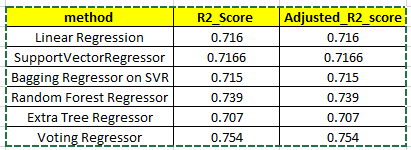